# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# removing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('stroke.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


<div class="alert alert-block alert-info"><b>conclusion:</b><br>1-Age columns has a high std and some wrong values(min=0.08)<br>2-BMI column has some nan values.<br>3-BMI column may has some wrong values(max = 97).</div>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Data cleaning

In [5]:
# Detecting NaN calues
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
# dropping NaN values
data.dropna(inplace=True)

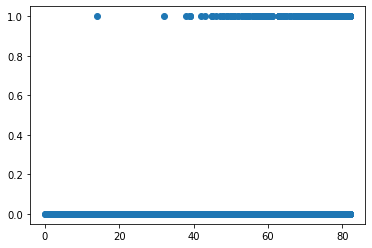

In [7]:
# Detecting why age column has some float values
plt.scatter(data.age, data.stroke)
plt.show()

In [8]:
a = data.age[data.age < 10].values
print(a)

[3.   8.   3.   4.   8.   0.64 4.   0.88 4.   5.   4.   5.   7.   3.
 5.   2.   7.   9.   5.   5.   9.   5.   5.   1.8  0.32 5.   1.08 5.
 1.8  7.   9.   4.   2.   1.8  9.   9.   6.   2.   1.16 7.   2.   5.
 2.   5.   9.   1.   1.4  2.   3.   4.   1.72 8.   8.   7.   1.   6.
 3.   5.   7.   9.   0.88 2.   1.4  0.24 4.   6.   9.   8.   5.   9.
 5.   8.   0.32 1.64 3.   2.   1.56 1.72 7.   4.   3.   2.   2.   0.72
 1.88 8.   3.   3.   1.24 2.   4.   2.   8.   8.   5.   5.   3.   0.8
 6.   4.   1.08 3.   2.   2.   6.   9.   5.   6.   2.   1.   3.   9.
 2.   8.   2.   3.   1.88 5.   2.   1.24 4.   5.   8.   2.   0.4  1.24
 0.08 7.   1.48 2.   6.   3.   8.   6.   8.   3.   8.   1.72 5.   4.
 2.   1.   0.64 8.   9.   8.   3.   5.   5.   8.   5.   1.48 5.   9.
 1.4  1.56 6.   3.   5.   0.56 3.   2.   0.24 0.56 0.64 6.   8.   2.
 3.   1.32 8.   4.   1.24 7.   6.   3.   9.   2.   5.   9.   1.72 3.
 2.   8.   1.   5.   9.   8.   6.   7.   5.   1.08 8.   2.   1.16 1.8
 6.   3.   5.   0.88 7.   3.

<div class="alert alert-block alert-warning">In age column Because most of the data under values 2 are float, i remove the under 2 values data.</div>

In [9]:
index = data[data.age < 2].index
data.drop(index, axis=0, inplace=True)

In [10]:
data.age.describe()

count    4795.000000
mean       43.857977
std        21.872093
min         2.000000
25%        26.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

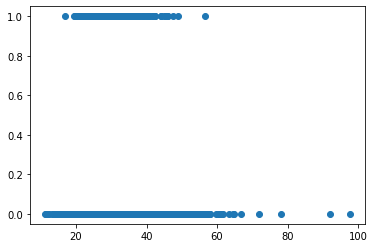

In [11]:
# BMI column has some high(outliers) values that shoud be checked
plt.scatter(data.bmi, data.stroke)
plt.show()

In [12]:
data.drop(data[data.bmi > 65].index, axis=0, inplace=True)

In [13]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


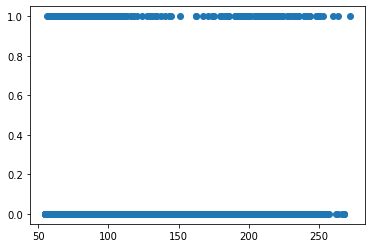

In [14]:
# checking avg_glucose_level for outliers.
plt.scatter(data.avg_glucose_level, data.stroke)
plt.show()

## Encoding

Columns to be encoded:<br>
1-gender<br>
2-ever_married<br>
3-work_type<br>
4-Residence_type<br>
5-smoking_status<br>

In [15]:
data.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [16]:
len(data[data.gender == "Other"])

1

In [17]:
data.drop(data[data.gender == "Other"].index, axis=0, inplace=True)

In [18]:
data = data.drop("id", axis=1)

In [19]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [21]:
lbl_encoder = LabelEncoder()

In [22]:
data.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [23]:
data.ever_married = lbl_encoder.fit_transform(data.ever_married)

In [24]:
"--------------------------------"

'--------------------------------'

In [25]:
data.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [26]:
"--------------------------------"

'--------------------------------'

In [27]:
data.Residence_type.unique()

array(['Urban', 'Rural'], dtype=object)

In [28]:
"--------------------------------"

'--------------------------------'

In [29]:
data.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [30]:
data[data.smoking_status == "Unknown"].describe()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke
count,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000,1367.000000
mean,31.871251,0.030724,0.027067,0.441843,98.534462,26.183102,0.021214
std,24.207760,0.172633,0.162337,0.496788,35.122117,7.849672,0.144151
min,2.000000,0.000000,0.000000,0.000000,55.230000,11.300000,0.000000
25%,9.000000,0.000000,0.000000,0.000000,76.835000,20.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,90.070000,25.100000,0.000000
75%,52.000000,0.000000,0.000000,1.000000,108.835000,30.700000,0.000000
max,82.000000,1.000000,1.000000,1.000000,254.600000,61.200000,1.000000


In [31]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,0,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked,0


In [32]:
# Encoding
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [0, 5, 6, 9])], remainder="passthrough")
data = ct.fit_transform(data)

In [33]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,67.0,0.0,1.0,1.0,228.69,36.6,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,1.0,1.0,105.92,32.5,1.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,49.0,0.0,0.0,1.0,171.23,34.4,1.0
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,79.0,1.0,0.0,1.0,174.12,24.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,81.0,0.0,0.0,1.0,186.21,29.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4784,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,103.08,18.6,0.0
4785,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,81.0,0.0,0.0,1.0,125.20,40.0,0.0
4786,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,35.0,0.0,0.0,1.0,82.99,30.6,0.0
4787,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,51.0,0.0,0.0,1.0,166.29,25.6,0.0


## Splitting data

In [34]:
x = data[:, :-1]
y = data[:, -1]
y = y.reshape(-1, 1)

In [35]:
y.ndim

2

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Feature scaling

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Processing

## Training Logistic regression model

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

## Evaluating model

In [42]:
y_pred = classifier.predict(x_test)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_test, y_pred)

0.9530271398747391

## Training KNN model

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
classifier = KNeighborsClassifier()
classifier.fit(x_train, y_train)

KNeighborsClassifier()

## Evaluating model

In [47]:
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.9519832985386222

In [48]:
pre_result = 0
result = 0
counter = 0
for i in range(1, 20):
    knn_classifier = KNeighborsClassifier(n_neighbors=i, metric="minkowski", p=2)
    knn_classifier.fit(x_train, y_train)
    knn_y_pred = knn_classifier.predict(x_test)
    pre_result = accuracy_score(y_test, knn_y_pred)
    if pre_result > result:
        result = pre_result
        counter = i
    else:
        pass
print(f"{counter}= {result}")

4= 0.9530271398747391


## Training SVM model

In [49]:
from sklearn.svm import SVC

In [50]:
classifier = SVC(kernel="rbf")
classifier.fit(x_train, y_train)

SVC()

## Evaluating model

In [51]:
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.9530271398747391

## Training Naive bayes model

In [52]:
from sklearn.naive_bayes import GaussianNB

In [53]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

## Evaluating model

In [54]:
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.2985386221294363

## Training Decision tree model

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
classifier = DecisionTreeClassifier(criterion="entropy", min_samples_split=6, min_samples_leaf=7)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=7,
                       min_samples_split=6)

## Evaluating model

In [57]:
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.9488517745302714

## Training Random forest model

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
classifier = RandomForestClassifier(criterion="entropy")
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

## Evaluating

In [60]:
y_pred = classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.9530271398747391